# clustering calcium signals
https://docs.google.com/document/d/18pjHYOuAd8yLlwQOMr20EXVkvPd2xPTn99PT9L2-_yo/edit#

## The plan
- try rastermap
- 

![title](bauerLGN.png)


In [177]:
import tifffile 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as ipw
from rastermap import Rastermap as rm
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram


## load data

In [9]:
filepath = Path("../../data/processed/suite2p/plane0")
filepath

WindowsPath('../../data/processed/suite2p/plane0')

In [10]:
F = np.load(filepath.joinpath('F.npy'), allow_pickle=True)
Fneu = np.load(filepath.joinpath('Fneu.npy'), allow_pickle=True)
deconv = np.load(filepath.joinpath('spks.npy'), allow_pickle=True)
stat = np.load(filepath.joinpath('stat.npy'), allow_pickle=True)
ops = np.load(filepath.joinpath('ops.npy'), allow_pickle=True).item()
iscell = np.load(filepath.joinpath('iscell.npy'), allow_pickle=True)

In [3]:
dir(rm)

['Rastermap',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mapping',
 'name']

## Rastaplot model and visualization

model = Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

. fit does not return anything, it adds attributes to model
. attributes: embedding, u, s, v, isort1

model.fit(sp)
plt.imshow(sp[model.isort1, :])

. fit_transform returns embedding (upsampled cluster identities)
embedding = model.fit_transform(sp)

. transform can be used on new samples with the same number of features as sp
embed2 = model.transform(sp2)

In [54]:
model = rm(n_components=1, n_X=30, nPC=200, init='pca')
model?

Type:        Rastermap
String form: <rastermap.mapping.Rastermap object at 0x000001A623085730>
File:        c:\users\uwele\anaconda3\lib\site-packages\rastermap\mapping.py
Docstring:  
Rastermap embedding algorithm
Rastermap takes the nPCs (400 default) of the data, and embeds them into
n_X clusters. It returns upsampled cluster identities (n_X*upsamp).
Optionally, a 1D embeddding is also computed across the second dimension (n_Y>0),
smoothed over, and the PCA recomputed before fitting Rastermap.

data X: n_samples x n_features

Parameters
-----------
n_components : int, optional (default: 2)
    dimension of the embedding space
alpha : float, optional (default: 1.0)
    exponent of the power law enforced on component n as: 1/(K+n)^alpha
K :  float, optional (default: 1.0)
    additive offset of the power law enforced on component n as: 1/(K+n)^alpha
n_X :  int, optional (default: 40)
    size of the grid on which the Fourier modes are rasterized
n_Y : int, optional (default: 0, i.e. n

In [33]:
deconvcells = deconv[np.where(iscell[:,0] == 1)]
deconvcells.shape

(109, 2250)

In [42]:
deconvnotcells = deconv[np.where(iscell[:,0] == 0)]
deconvnotcells.shape

(338, 2250)

nmin 109
0.0
0.10393714904785156
0.10493731498718262
0.10693550109863281
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0360      2
0.03s    10        0.1178      4
0.06s    20        0.1977      8
0.09s    30        0.3580      18
0.16s    40        0.4834      28
0.19s    50        0.4836      28
0.21s   final      0.4836
0.21s upsampled    0.4836


Text(0.5, 1.0, 'cells sorted')

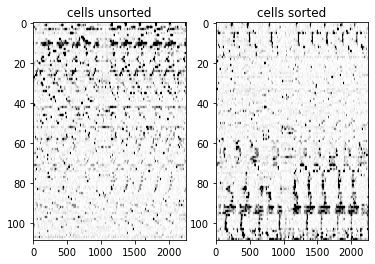

In [57]:
model.fit(deconvcells)
plt.subplot(1,2,1)
plt.imshow(deconvcells,vmin =0, vmax =200, cmap = 'gray_r', aspect = 'auto')
plt.title('cells unsorted')
plt.subplot(1,2,2)
plt.imshow(deconvcells[model.isort, :],vmin =0, vmax =200, cmap = 'gray_r', aspect = 'auto')
plt.title('cells sorted')

nmin 109
0.005979299545288086
0.17588067054748535
0.17787790298461914
0.17987632751464844
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.01s     0        0.0241      2
0.08s    10        0.0919      4
0.12s    20        0.1487      8
0.24s    30        0.2523      18
0.31s    40        0.3399      28
0.34s    50        0.3428      28
0.39s   final      0.3429
0.39s upsampled    0.3429


Text(0.5, 1.0, 'non-cells sorted')

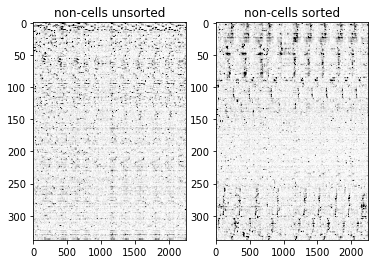

In [58]:
model.fit(deconvnotcells)
plt.subplot(1,2,1)
plt.imshow(deconvnotcells,vmin =0, vmax =200, cmap = 'gray_r', aspect = 'auto')
plt.title('non-cells unsorted')
plt.subplot(1,2,2)
plt.imshow(deconvnotcells[model.isort, :],vmin =0, vmax =200, cmap = 'gray_r', aspect = 'auto')
plt.title('non-cells sorted')

 ## Kids building their own Rastamap

. try a correlation attempt

In [60]:
corrmat = np.corrcoef(deconvcells)

In [61]:
corrmat.shape

(109, 109)

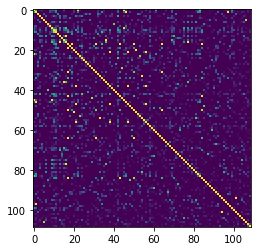

In [64]:
plt.imshow(corrmat, vmin= 0, vmax = 0.3)

## Kmeans clustering

In [76]:
clusters = cluster.KMeans(5).fit(corrmat)

In [79]:
labels = clusters.labels_

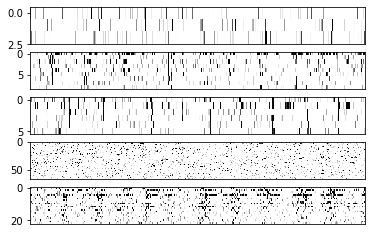

In [120]:
for i in range(1,len(np.unique(labels))+1):
    plt.subplot(len(np.unique(labels)), 1, i)
    plt.imshow(deconvcells[np.where(labels == i-1)], vmin = 0, vmax = 200, cmap = 'gray_r',        aspect='auto',interpolation = 'none')
    plt.xticks(ticks=[])

## Ward clustering

In [145]:
clusters_ward = cluster.AgglomerativeClustering(n_clusters = 5,linkage='ward')
#clusters_ward = cluster.Ward(n_clusters = 5)
#.fit(corrmat)
labels_ward = clusters_ward.fit(corrmat).labels_


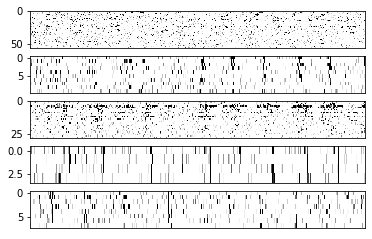

In [146]:
for i in range(1,len(np.unique(labels_ward))+1):
    plt.subplot(len(np.unique(labels_ward)), 1, i)
    plt.imshow(deconvcells[np.where(labels_ward == i-1)], vmin = 0, vmax = 200, cmap = 'gray_r',        aspect='auto',interpolation = 'none')
    plt.xticks(ticks=[])


# plot the tree

In [174]:
clusters_ward = cluster.AgglomerativeClustering(n_clusters = int(sum(iscell[:,0])),linkage='ward',compute_distances=True)
wardcluster = clusters_ward.fit(corrmat)

In [181]:
child = wardcluster.children_
distance = wardcluster.distances_
labels1000 = wardcluster.labels_

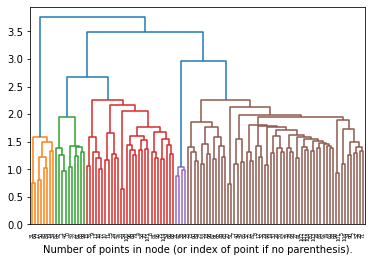

In [180]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


'''#iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')'''
# plot the top three levels of the dendrogram
plot_dendrogram(wardcluster)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [182]:
labels1000

array([ 97, 102,  70,  73,  59,  92,  63,  94,  89,  67,  88,  58,  80,
        84,  71,  96, 100, 105,  72,  61, 107, 104,  78,  93,  82,  98,
       106,  83,  62,  95,  35,  52,  66, 108,  99, 103,  69,  68, 101,
        75,  90,  34,  55,  49,  51,  81,  48,  65,  91,  79,  57,  76,
        60,  64,  37,  31,  28,  54,  87,  85,  44,  33,  40,  29,  86,
        53,  74,  43,  46,  77,  56,  38,  21,  16,  45,  42,  27,  41,
        32,  30,  14,  20,  26,  15,  36,  22,  17,  39,  25,  19,  18,
        50,  10,   9,  12,   7,  13,   8,  47,   3,   4,   6,  23,  24,
        11,   5,   1,   2,   0], dtype=int64)

([], [])

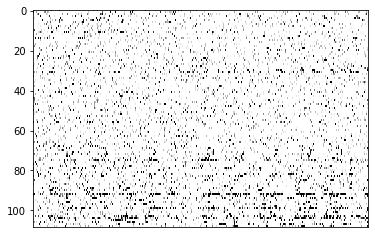

In [183]:
plt.imshow(deconvcells[labels1000], vmin = 0, vmax = 200, cmap = 'gray_r',aspect='auto',interpolation = 'none')
plt.xticks(ticks=[])
